In [135]:
from keras.datasets import imdb

In [136]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [137]:
max([max(sequence) for sequence in train_data])

9999

In [138]:
#decoding back to english
word_index = imdb.get_word_index() 
reverse_word_index = dict([value, key] for(key, value) in word_index.items())
decode_review = ' '.join(reverse_word_index.get(i-3, '?') for i in train_data[0])

In [139]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [140]:
#Vectorizing the data
import numpy as np

In [141]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results

In [142]:
#Explanation for above code
n=0
r = np.zeros((len(train_data[0]), 10000))

for i,j in enumerate(train_data[0]):
    print(i, j)
    r[i, j] = 1
    n=n+1
    if n > 5:
        break
print(r[1][14])
print(r[2][22])

0 1
1 14
2 22
3 16
4 43
5 530
1.0
1.0


In [143]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
test_labels.dtype

dtype('int64')

In [144]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np. asarray(test_labels).astype('float32')

In [145]:
x_train.shape

(25000, 10000)

In [146]:
#Implementing the network for training
from keras import models
from keras import layers

In [159]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [160]:
model1 = models.Sequential()
model1.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(4, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [161]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])
model1.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

In [149]:
#the above can be done as:
from keras import optimizers, losses, metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss = losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

In [162]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [163]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [164]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history1 = model1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
#results = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 402us/step - loss: 0.2500 - acc: 0.4939 - val_loss: 0.2500 - val_acc: 0.5053
Epoch 2/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.2500 - acc: 0.5001 - val_loss: 0.2500 - val_acc: 0.4948
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - val_acc: 0.4948
Epoch 4/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - val_acc: 0.4948
Epoch 5/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - val_acc: 0.4948
Epoch 6/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - val_acc: 0.4948
Epoch 7/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - 

In [165]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [166]:
#Plotting the validation, training, losses and accuracy using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [170]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values1 = history1.history['val_loss']
epochs = range(1, len(val_loss_values)+1)
val_loss_values1

[0.2500241803646088,
 0.2500307737350464,
 0.25003536262512205,
 0.2500455141544342,
 0.2500402960300446,
 0.2500463949680328,
 0.2500531497001648,
 0.2500524003505707,
 0.25004754552841185,
 0.2500453714370727,
 0.250034624004364,
 0.2500385181427002,
 0.2500456526279449,
 0.25005789642333986,
 0.250066650056839,
 0.25006100783348084,
 0.250065367603302,
 0.25006642179489136,
 0.2500546928882599,
 0.25004430985450743]

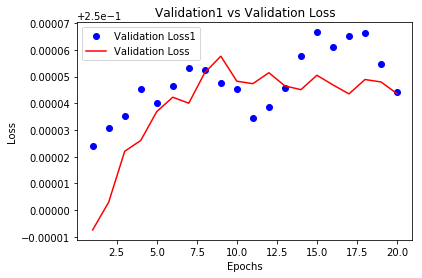

In [168]:
plt.plot(epochs, val_loss_values1, 'bo', label='Validation Loss1')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Validation1 vs Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [157]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

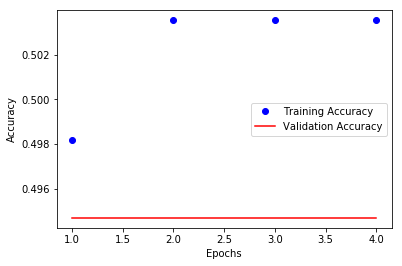

In [158]:
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [106]:
results

[0.6931721181869507, 0.49996]

In [107]:
model.predict(x_test)

array([[0.5056811 ],
       [0.49651918],
       [0.49651918],
       ...,
       [0.49651918],
       [0.49651918],
       [0.49651918]], dtype=float32)